In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift
from copy import deepcopy

img = cv2.imread('flower.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

### K - Means clustering and Expectation Maximization

Implementation of Kmeans and EM for purposes of Image Segmentation, implementino of the algorithm was done from scratch using Numpy library. The image segmented was *flower.png

### K-means clustering

In [22]:
def Kmeans_rgb(img, k, maxVal): #Functions that will be used for RGB image
    centroids = []
    o_centroids = []
    
    for i in range(k): #Initilizing first three clusters
        centroids.append(np.random.randint(0,255,3))
    img2 = img.reshape((img.shape[0] * img.shape[1]),3)
    n = img2.shape[0]
    
    for t in range(maxVal): #Start running k means
        cluster = []
        for j in range(n):
            distances = np.linalg.norm(img2[j] - centroids, axis=1)
            cluster.append(np.argmin(distances))
        o_centroids = deepcopy(centroids)        
        
        for i in range(k):
            features_idx = []
            for j in range(len(cluster)):
                if cluster[j] == i:
                    features_idx.append(img2[j])
            centroids[i] = np.mean(features_idx,axis=0)
            
            if np.all(np.asarray(centroids) == np.asarray(o_centroids)):
                break
    
    return np.asarray(cluster), centroids, np.asarray(o_centroids)

In [40]:
def Kmeans_gray(img, k, maxVal): #Function that will be used for Gray image
    centroids = []
    o_centroids = []
    
    for i in range(k):
        centroids.append(np.random.randint(0,255,1))
    img2 = img.reshape((-1,1))
    n = img2.shape[0]
    for t in range(maxVal): #Start running k means
        cluster = []
        for j in range(n):
            distances = np.linalg.norm(img2[j] - centroids,axis=1)
            cluster.append(np.argmin(distances))
        o_centroids = deepcopy(centroids)        
        
        for i in range(k):
            features_idx = []
            for j in range(len(cluster)):
                if cluster[j] == i:
                    features_idx.append(img2[j])
            centroids[i] = np.mean(features_idx,axis=0)
            
            if np.all(np.asarray(centroids) == np.asarray(o_centroids)):
                break
    
    return np.asarray(cluster), centroids, np.asarray(o_centroids)
    
    

In [204]:
def Kmeans_gendata(data, k, maxVal): #Function that will be used for the generated data
    centroids = []
    o_centroids = []
    
    for i in range(k):
        centroids.append(np.random.randint(0,255,1))
    #data = data.shape[0]
    n = len(data)
    for t in range(maxVal): #Start running k means
        cluster = []
        for j in range(n):
            distances = np.linalg.norm(data[j] - centroids,axis=0)
            cluster.append(np.argmin(distances))
        o_centroids = deepcopy(centroids)        
        
        for i in range(k):
            features_idx = []
            for j in range(len(cluster)):
                if cluster[j] == i:
                    features_idx.append(data[j])
            centroids[i] = np.mean(features_idx,axis=0)
            
            if np.all(np.asarray(centroids) == np.asarray(o_centroids)):
                break
    
    return np.asarray(cluster), centroids, np.asarray(o_centroids)

#### First 5 Iterations for K=2

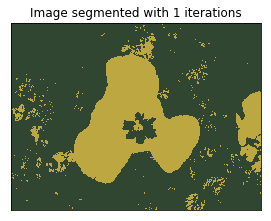

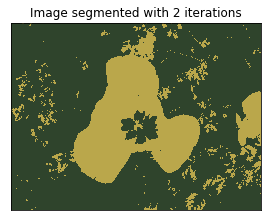

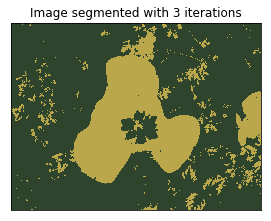

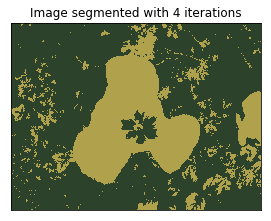

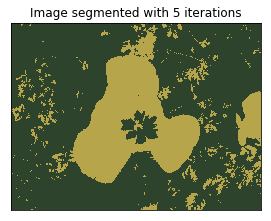

In [114]:
for i in range(5):
    cl, cn, o_cn = Kmeans_rgb(img_rgb,2,i+1)
    cn = np.uint8(cn)
    segments = cn[cl.flatten()]
    segments = segments.reshape(img.shape)
    
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1), plt.imshow(segments),plt.xticks([]),plt.yticks([])
    plt.title('Image segmented with {} iterations'.format(i+1))
    plt.show()

#### Last Iterations for K=2

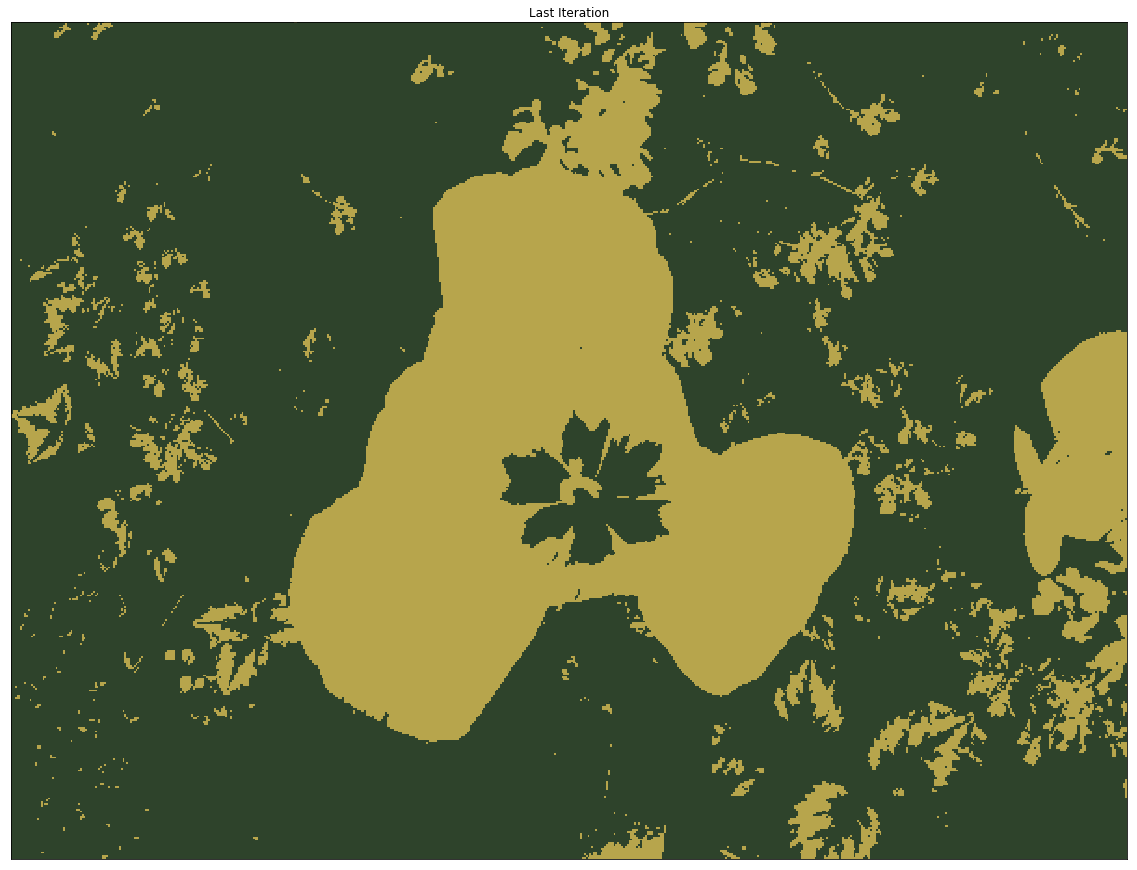

In [6]:
cl, cn, o_cn = Kmeans_rgb(img_rgb,2,50)

cn = np.uint8(cn)
segments = cn[cl.flatten()]
segments = segments.reshape(img.shape)

plt.figure(figsize=(20,20))
plt.imshow(segments),plt.xticks([]),plt.yticks([]), plt.title('Last Iteration')
plt.show()

#### First 5 Iterations for K=3

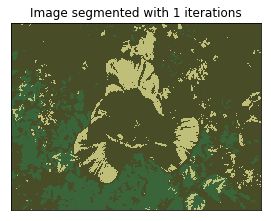

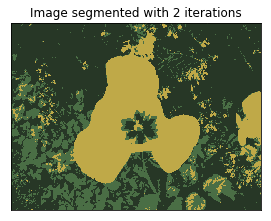

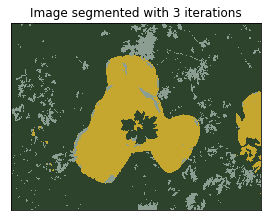

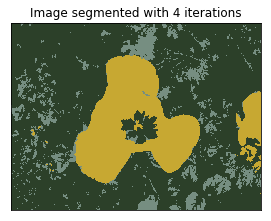

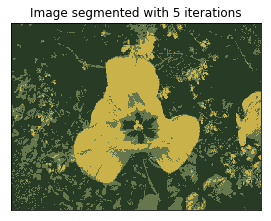

In [25]:
for i in range(5):
    cl, cn, o_cn = Kmeans_rgb(img_rgb,3,i+1)
    cn = np.uint8(cn)
    segments = cn[cl.flatten()]
    segments = segments.reshape(img.shape)
    
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1), plt.imshow(segments),plt.xticks([]),plt.yticks([])
    plt.title('Image segmented with {} iterations'.format(i+1))
    plt.show()

#### Last Iteration for K=3

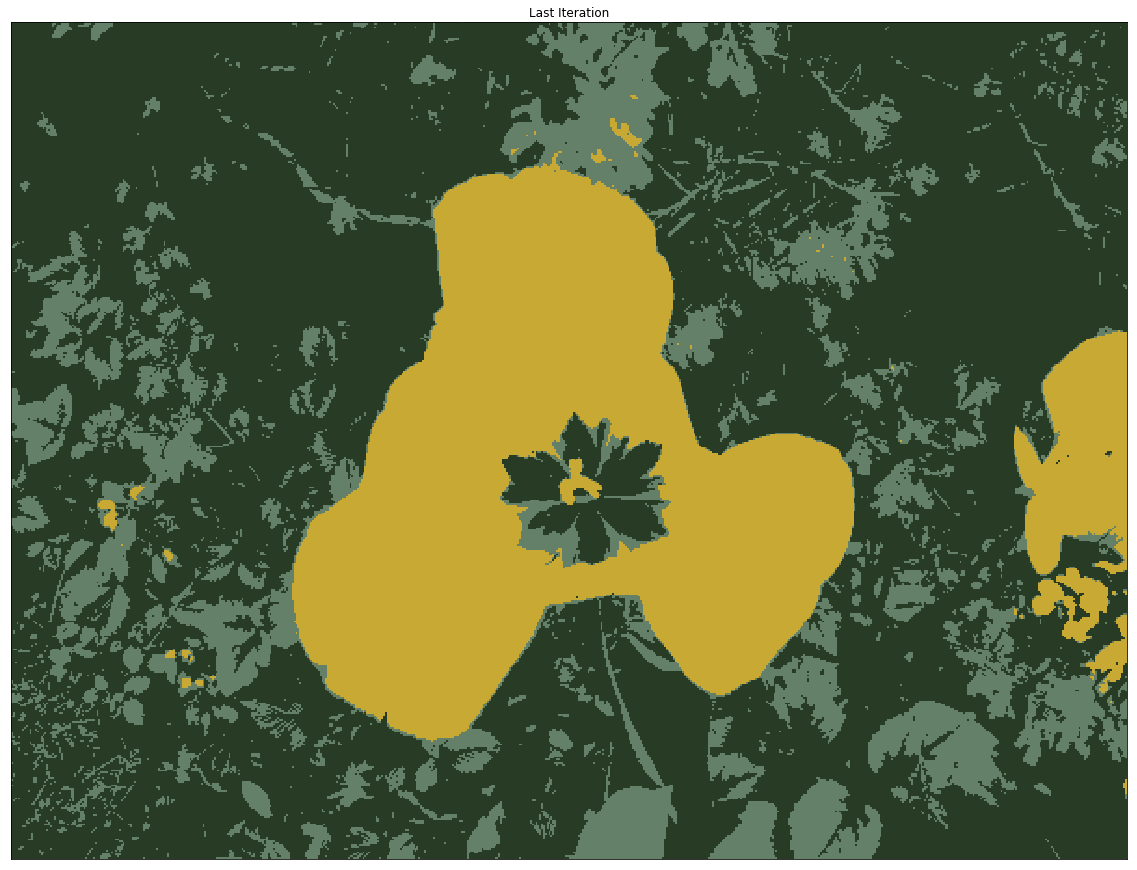

In [8]:
cl, cn, o_cn = Kmeans_rgb(img_rgb,3,50)

cn = np.uint8(cn)
segments = cn[cl.flatten()]
segments = segments.reshape(img.shape)

plt.figure(figsize=(20,20))
plt.imshow(segments),plt.xticks([]),plt.yticks([]), plt.title('Last Iteration')
plt.show()

#### First 5 Iterations for Gray Image for K=2

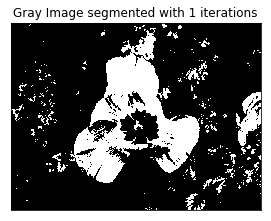

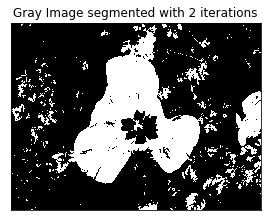

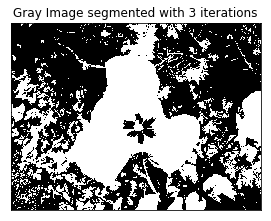

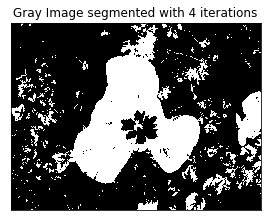

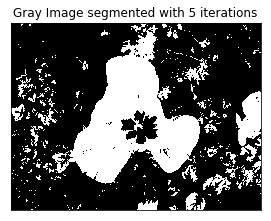

In [9]:
for i in range(5):
    cl, cn, o_cn = Kmeans_gray(img_gray,2,i+1)
    cn = np.uint8(cn)
    segments = cn[cl.flatten()]
    segments = segments.reshape(img_gray.shape)
    
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1), plt.imshow(segments, cmap='gray'),plt.xticks([]),plt.yticks([])
    plt.title('Gray Image segmented with {} iterations'.format(i+1))
plt.show()

#### Last Iteration for K = 2 for the Gray image

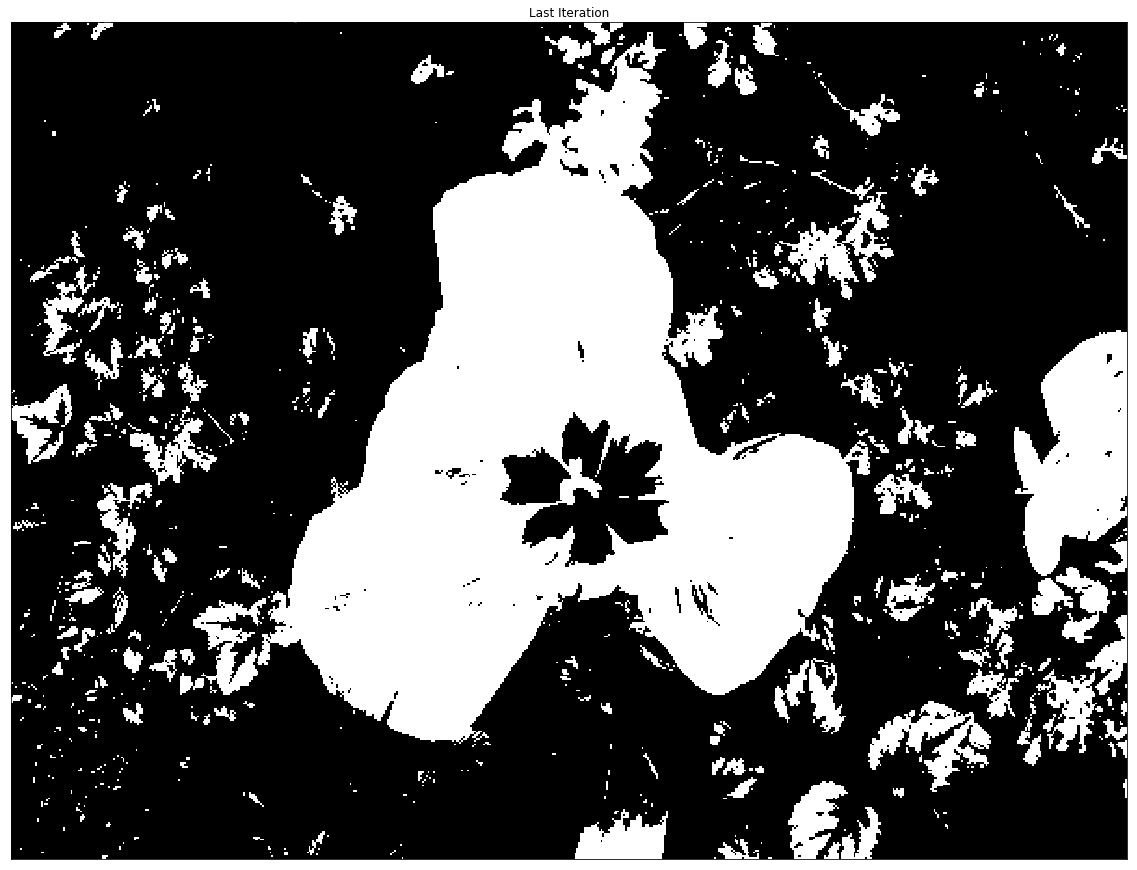

In [10]:
cl, cn, o_cn = Kmeans_gray(img_gray,2,50)

cn = np.uint8(cn)
segments = cn[cl.flatten()]
segments = segments.reshape(img_gray.shape)

plt.figure(figsize=(20,20))
plt.imshow(segments, cmap='gray'),plt.xticks([]),plt.yticks([]), plt.title('Last Iteration')
plt.show()

#### First 5 Iterations for Gray Image for K=3

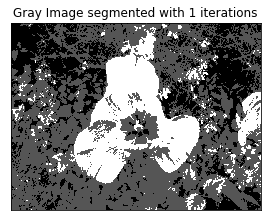

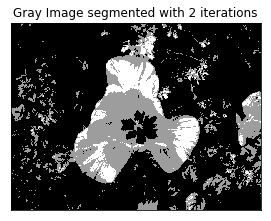

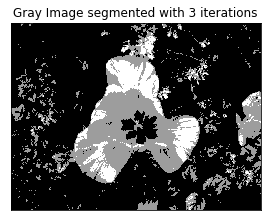

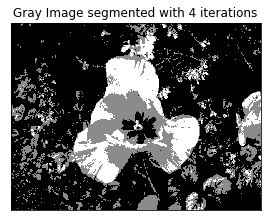

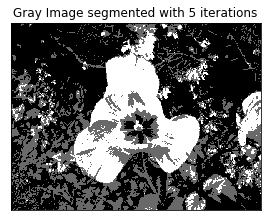

In [11]:
for i in range(5):
    cl, cn, o_cn = Kmeans_gray(img_gray,3,i+1)
    cn = np.uint8(cn)
    segments = cn[cl.flatten()]
    segments = segments.reshape(img_gray.shape)
    
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1), plt.imshow(segments, cmap='gray'),plt.xticks([]),plt.yticks([])
    plt.title('Gray Image segmented with {} iterations'.format(i+1))
    plt.show()

#### Last Iteration for K = 2 for the Gray image

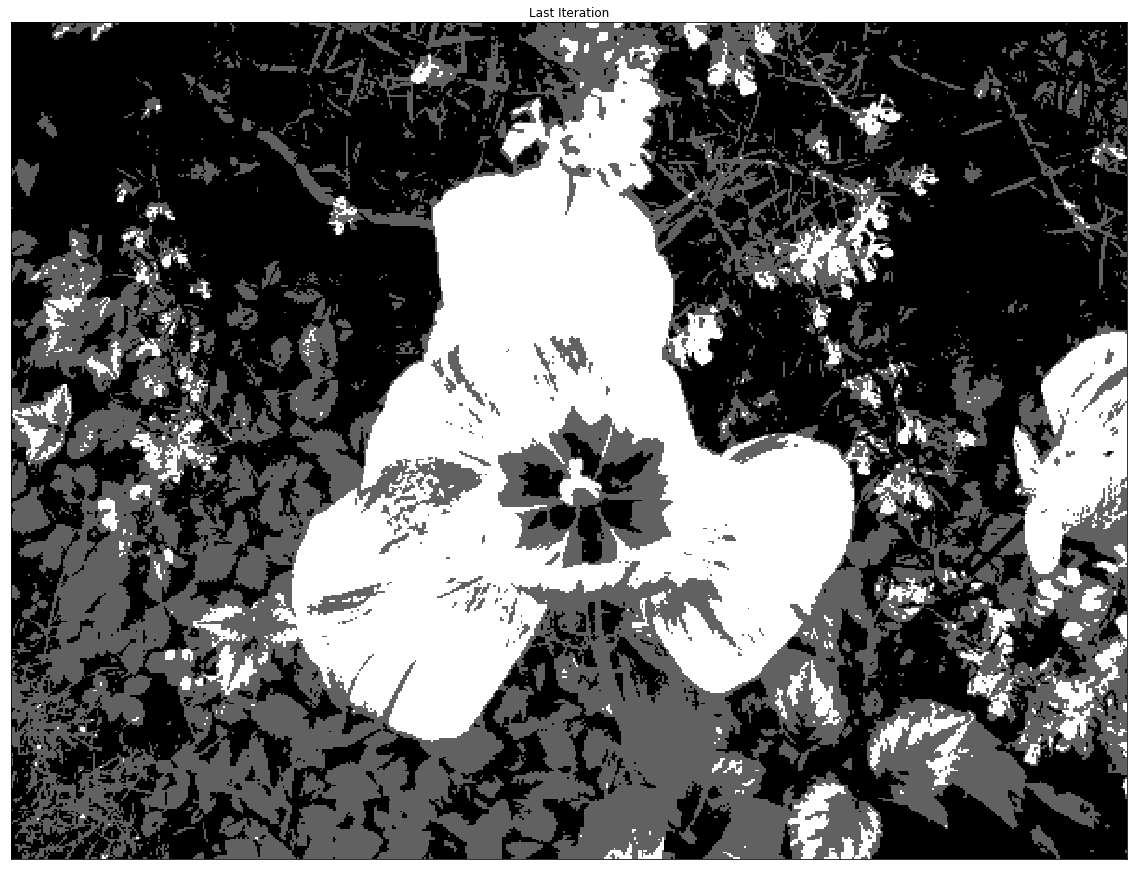

In [602]:
cl, cn, o_cn = Kmeans_gray(img_gray,3,50)

cn = np.uint8(cn)
segments = cn[cl.flatten()]
segments = segments.reshape(img_gray.shape)

plt.figure(figsize=(20,20))
plt.imshow(segments, cmap='gray'),plt.xticks([]),plt.yticks([]), plt.title('Last Iteration')
plt.show()

One is able to resolve more details of the image by using the gray scale of my implementation of the K means clusternig. The RGB image, at the final iterations, provides less details

### Expectation Maximization

In [5]:
def e_m(data, K, iterations):
    # initialize random gaussian points
    mean = np.zeros((K, data.shape[1]))
    cov = np.zeros((K,data.shape[1],data.shape[1]))
    wt = np.zeros((K))
    
    for m in range(K):
        mean[m] = data[np.random.randint(0, data.shape[0]-1)]
    cov[:] = np.eye(data.shape[1])
    wt[:] = 1/K    
    difference = np.zeros(data.shape[0])    
    for i in range(iterations):
        # initialize the probability array
        probability = np.zeros((data.shape[0], mean.shape[0]))
        
        # E step
        for j in range(len(data)):
            for k in range(len(mean)):
                difference = data[j] - mean[k]
                operation2 = (-1*(1/2))*(np.dot(np.transpose(difference), np.dot(difference, np.linalg.inv(cov[k]))))
                operation1 = wt[k]/(np.sqrt(2*np.pi)*np.sqrt(np.linalg.det(cov[k])))
                
                prod = operation1*np.exp(operation2)
                probability[j][k] = prod
                
            # Probability that the data point belongs to cluster
            probability[j] = probability[j]/sum(probability[j])
        
        # M step
        newMean = np.zeros((K, data.shape[1]))
        newCov = np.zeros((K, data.shape[1], data.shape[1]))
        newWeight = np.zeros((K))
        totalProb = np.zeros((K))
        
        for j in range(K):
            for k in range(len(data)):
                totalProb[j] += probability[k][j]        
        
        for j in range(K):
            for k in range(len(data)):
                newMean[j] += data[k]*probability[k][j]
            newMean[j] /= totalProb[j]
               
        for j in range(K):
            for k in range(len(data)):
                difference = (data[k] - mean[j])[np.newaxis]
                newCov[j] += probability[k][j]*np.dot(np.transpose(difference), difference)
            newCov[j] /= totalProb[j]
        
        # New Weight
        for j in range(K):
            newWeight[j] = totalProb[j]/(data.shape[0])
        

        mean = newMean
        cov = newCov
        wt = newWeight
        
    return probability, mean

In [6]:
img_float = np.float32(img_rgb)
img_2 = img_float/255
N = img_2.reshape((-1,3))

img_gray_float = np.float32(img_gray)
img_3 = img_gray_float/255
G = img_3.reshape((-1,1))

#### First 5 iterations for 2 Gaussians for RGB Image

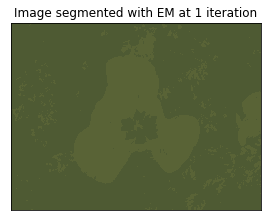

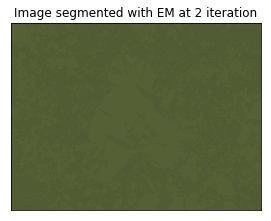

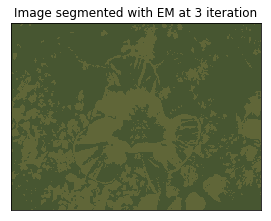

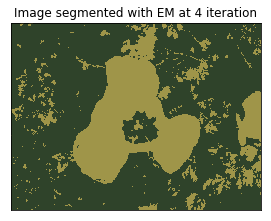

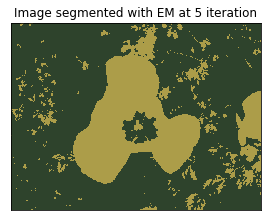

In [24]:
for i in range(5):
    probability, mean = e_m(N,2,i+1)
    data_copy = N.copy()
    for j in range(len(N)):
        maxProb_idx = np.argmax(probability[j])
        data_copy[j] = mean[maxProb_idx]

    data_copy = data_copy.reshape(img_2.shape)
    
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1), plt.imshow(data_copy), plt.title('Image segmented with EM at {} iteration'.format(i+1))
    plt.xticks([]), plt.yticks([])
    plt.show()

#### Last EM iteration using 2 Gaussians for RGB Image

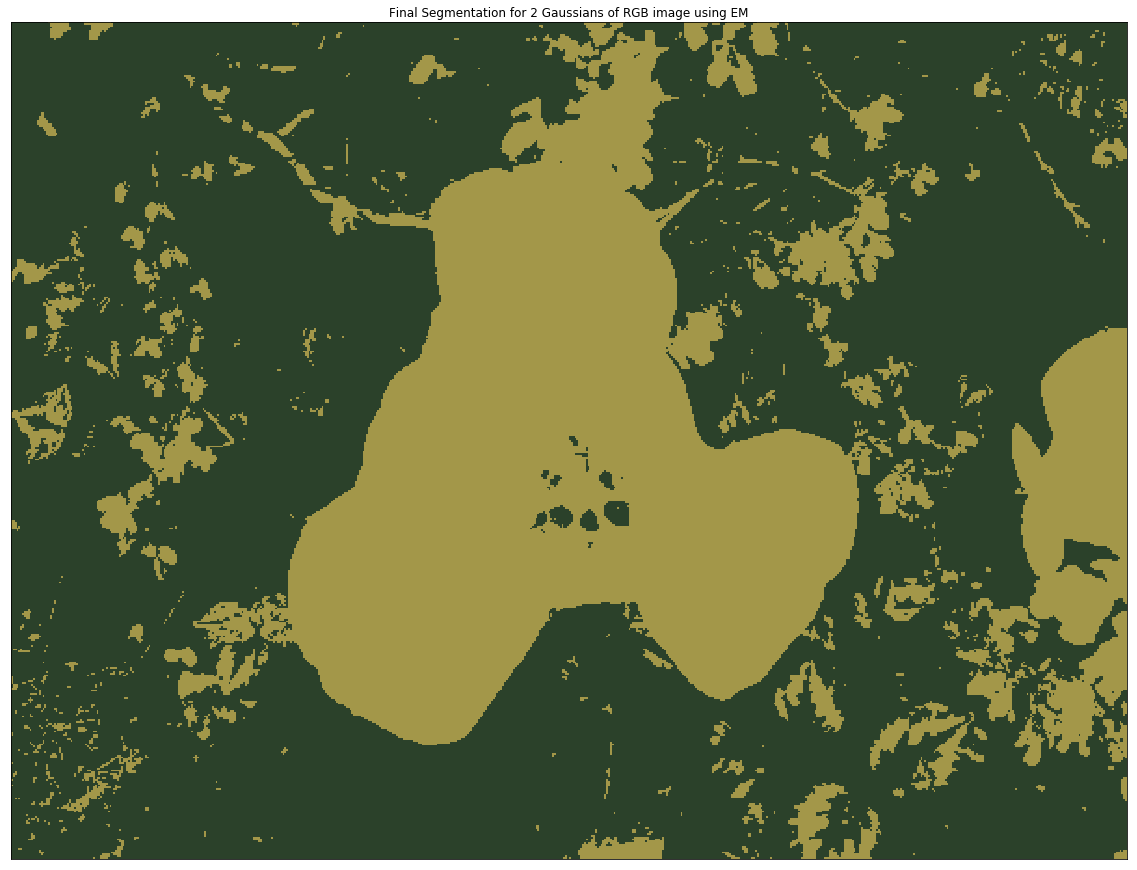

In [11]:
probability, mean = e_m(N,2,10)
data_copy = N.copy()
for i in range(len(N)):
    maxProb_idx = np.argmax(probability[i])
    data_copy[i] = mean[maxProb_idx]

final_img = data_copy.reshape(img_2.shape)
plt.figure(figsize=(20,20))
plt.imshow(final_img),plt.xticks([]),plt.yticks([])
plt.title('Final Segmentation for 2 Gaussians of RGB image using EM')
plt.show()

#### First 5 iterations for 3 Gaussians for RGB Image

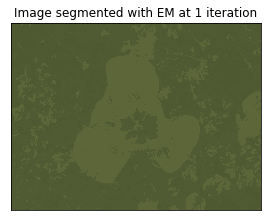

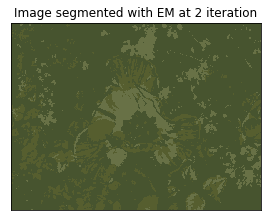

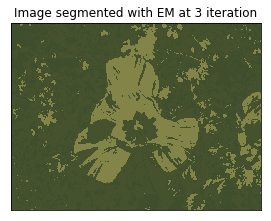

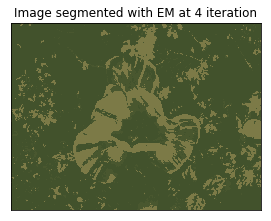

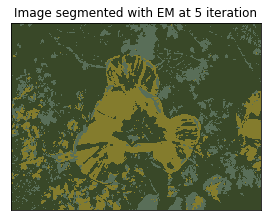

In [12]:
for i in range(5):
    probability, mean = e_m(N,3,i+1)
    data_copy = N.copy()
    for j in range(len(N)):
        maxProb_idx = np.argmax(probability[j])
        data_copy[j] = mean[maxProb_idx]

    data_copy = data_copy.reshape(img_2.shape)
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1), plt.imshow(data_copy), plt.title('Image segmented with EM at {} iteration'.format(i+1))
    plt.xticks([]), plt.yticks([])
    plt.show()

#### Last EM iteration using 3 Gaussians for RGB Image

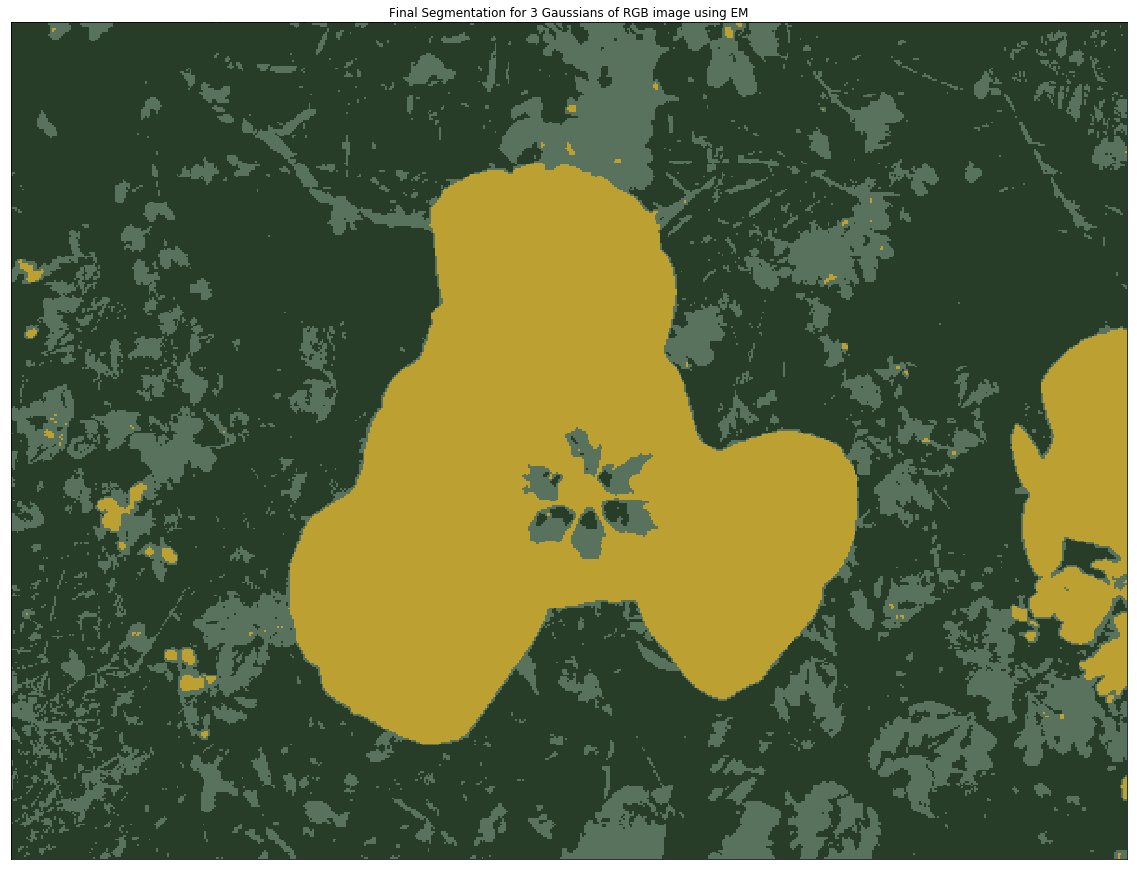

In [13]:
probability, mean = e_m(N,3,10)
data_copy = N.copy()
for i in range(len(N)):
    maxProb_idx = np.argmax(probability[i])
    data_copy[i] = mean[maxProb_idx]

final_img = data_copy.reshape(img_2.shape)
plt.figure(figsize=(20,20))
plt.imshow(final_img),plt.xticks([]),plt.yticks([])
plt.title('Final Segmentation for 3 Gaussians of RGB image using EM')
plt.show()

#### First 5 iterations for 2 Gaussians for Gray Image

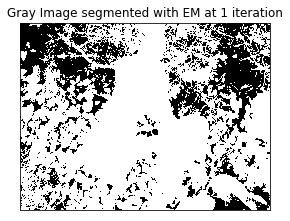

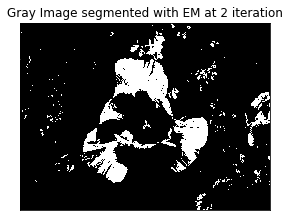

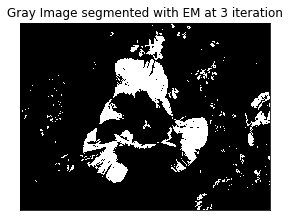

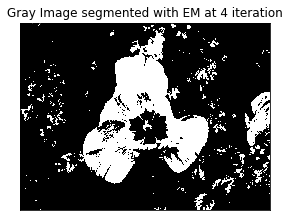

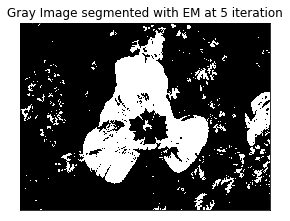

In [15]:
for i in range(5):
    probability, mean = e_m(G,2,i+1)
    data_gray_copy = G.copy()
    for j in range(len(G)):
        maxProb_idx = np.argmax(probability[j])
        data_gray_copy[j] = mean[maxProb_idx]

    final_img = data_gray_copy.reshape(img_3.shape)
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1), plt.imshow(final_img, cmap='gray'), plt.xticks([]), plt.yticks([])
    plt.title('Gray Image segmented with EM at {} iteration'.format(i+1))
    plt.show()

#### Last EM iteration using 2 Gaussians for Gray Image

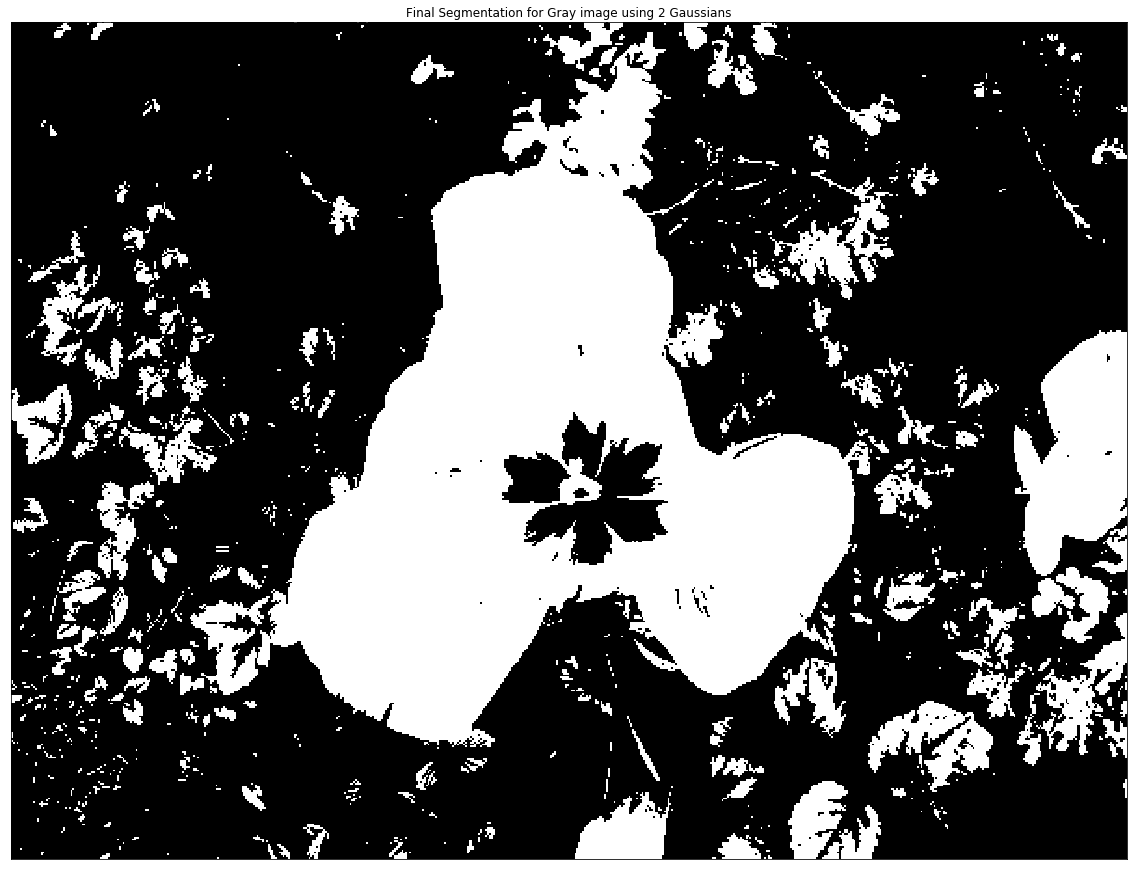

In [16]:
probability, mean = e_m(G, 2, 10)
data_gray_copy = G.copy()
for j in range(len(G)):
    maxProb_gray_idx = np.argmax(probability[j])
    data_gray_copy[j] = mean[maxProb_gray_idx]

final_img = data_gray_copy.reshape(img_3.shape)

plt.figure(figsize=(20,20))
plt.imshow(final_img, cmap='gray'),plt.xticks([]),plt.yticks([])
plt.title('Final Segmentation for Gray image using 2 Gaussians')
plt.show()

#### First 5 iterations for 3 Gaussians for Gray Image

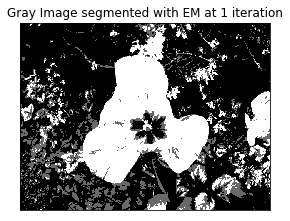

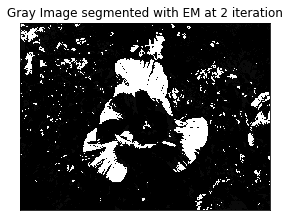

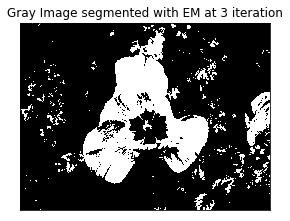

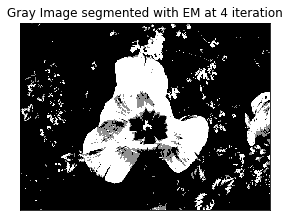

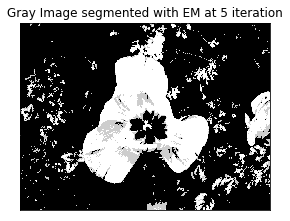

In [17]:
for i in range(5):
    probability, mean = e_m(G,3,i+1)
    data_gray_copy = G.copy()
    for j in range(len(G)):
        maxProb_idx = np.argmax(probability[j])
        data_gray_copy[j] = mean[maxProb_idx]

    final_img = data_gray_copy.reshape(img_3.shape)
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i+1), plt.imshow(final_img, cmap='gray'), plt.xticks([]), plt.yticks([])
    plt.title('Gray Image segmented with EM at {} iteration'.format(i+1))
    plt.show()

#### Last EM iteration using 3 Gaussians for Gray Image

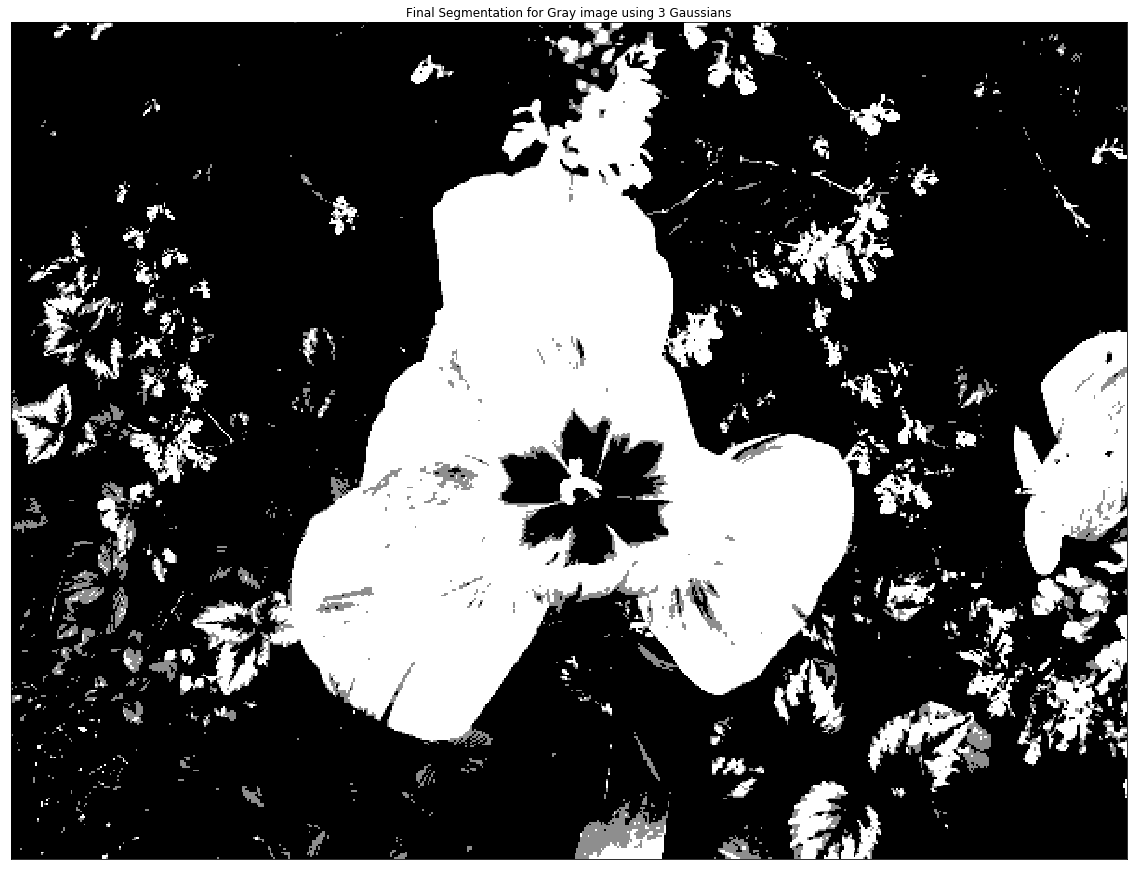

In [19]:
probability, mean = e_m(G, 3, 10)
data_gray_copy = G.copy()
for j in range(len(G)):
    maxProb_gray_idx = np.argmax(probability[j])
    data_gray_copy[j] = mean[maxProb_gray_idx]

final_img = data_gray_copy.reshape(img_3.shape)

plt.figure(figsize=(20,20))
plt.imshow(final_img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title('Final Segmentation for Gray image using 3 Gaussians')
plt.show()

From looking at the images being displayed after applying the EM algorithm, one can see that the gray images are able to separate more details than the images using the RGB colors

### 2.1.3 K-means and EM

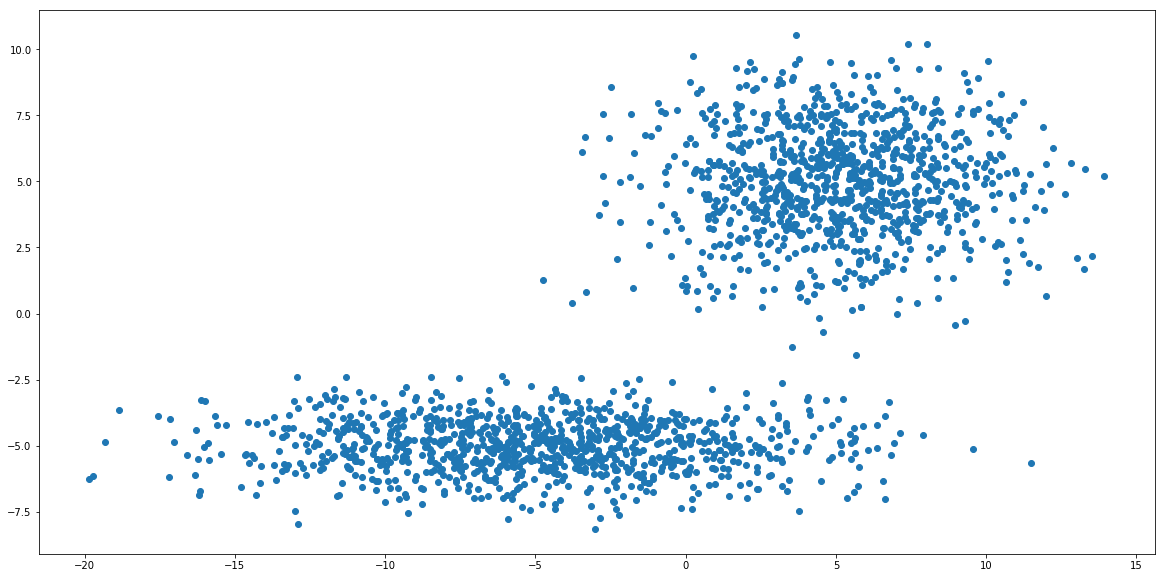

In [32]:
data = np.float32(
    np.vstack((
        np.random.normal(
                    loc=np.array([5, 5]),
                    scale=np.array([3, 2]),
                    size=(1000, 2)),
                    np.random.normal(
                    loc=np.array([-5, -5]),
                    scale=np.array([5, 1]),
                    size=(1000, 2)))))

x = data[:,0]
y = data[:,1]
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.show()

#### K means with generated data

In [207]:
cld, cnd, o_cnd = Kmeans_gendata(data,2,10)

c:\users\isaac\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


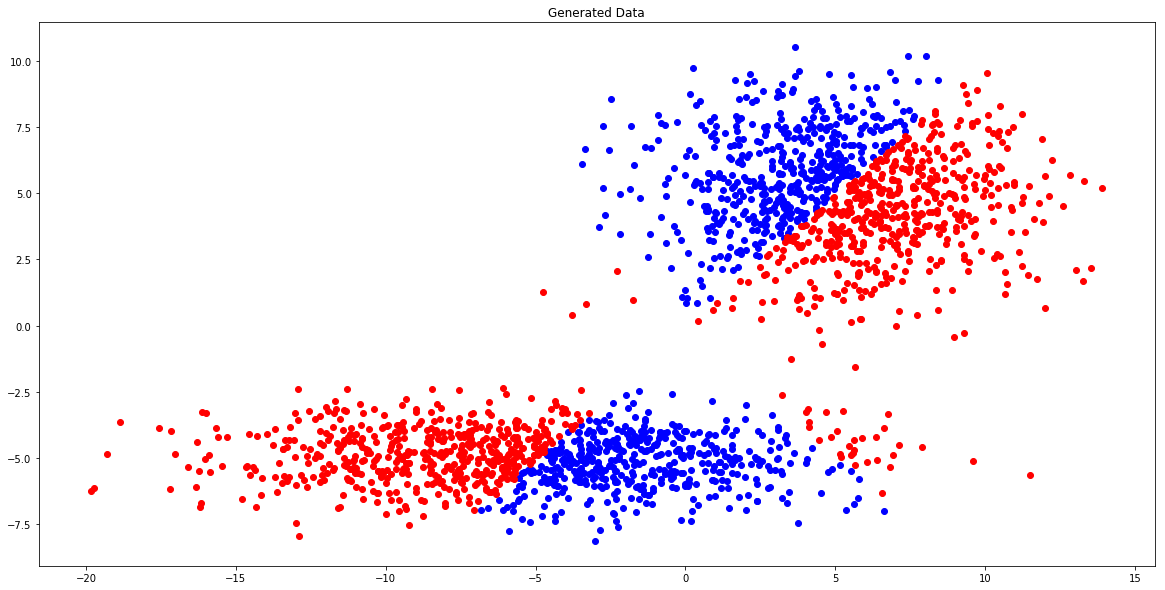

In [206]:
d2 = data[cld.ravel() == 0]
l2 = data[cld.ravel() == 1]

plt.figure(figsize = (20,10))
plt.scatter(d2[:,0], d2[:,1], color = 'b')
plt.scatter(l2[:,0], l2[:,1], color = 'r')
plt.title("Generated Data")
plt.show()

## Expectation Maximization with generated data

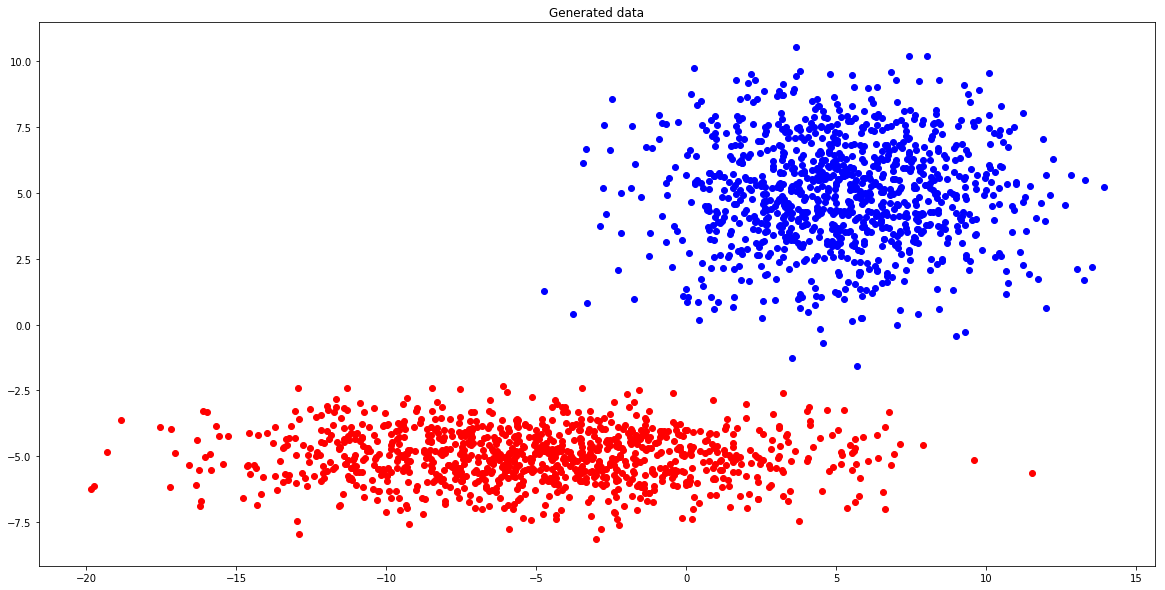

In [62]:
pb, mn = e_m(data,2,15)
max_prob = []
d3 = []
l3 = []
for i in range(len(data)):
    max_prob = np.argmax(pb[i])
    if max_prob == 0:
        d3.append(data[i])
    if max_prob == 1:
        l3.append(data[i])
d3 = np.array(d3)
l3 = np.array(l3)

plt.figure(figsize=(20,10))
plt.scatter(d3[:,0],d3[:,1], color='b')
plt.scatter(l3[:,0],l3[:,1], color='r')
plt.title('Generated data')
plt.show()

From the plots displayed above one tell that EM separates the data better than K means